#CREATION OF DATA
CALCULATION OF ANTENNA PARMERTERS BY CHANGING FEED POINT

C:\Users\HP\AppData\Local\Temp\ipykernel_13844\1071317584.py:39: RuntimeWarning: divide by zero encountered in log10
  S11 = 20 * np.log10(abs((Z_in - Z0) / (Z_in + Z0)))


    Feed Point X (mm)  Resonant Frequency (GHz)  Return Loss (dB)  \
0            0.000000                  0.009946          0.000000   
1            0.119798                  0.009946         -0.049362   
2            0.239596                  0.009946         -0.197133   
3            0.359394                  0.009946         -0.442419   
4            0.479192                  0.009946         -0.783887   
..                ...                       ...               ...   
95          11.380808                  0.009946        -15.764795   
96          11.500606                  0.009946        -18.595037   
97          11.620404                  0.009946        -22.456553   
98          11.740202                  0.009946        -28.823755   
99          11.860000                  0.009946              -inf   

    Bandwidth (MHz)  Impedance (Ω)  Gain (dBi)  
0               250       0.000000    1.845204  
1               250       0.142075    1.845204  
2               250     

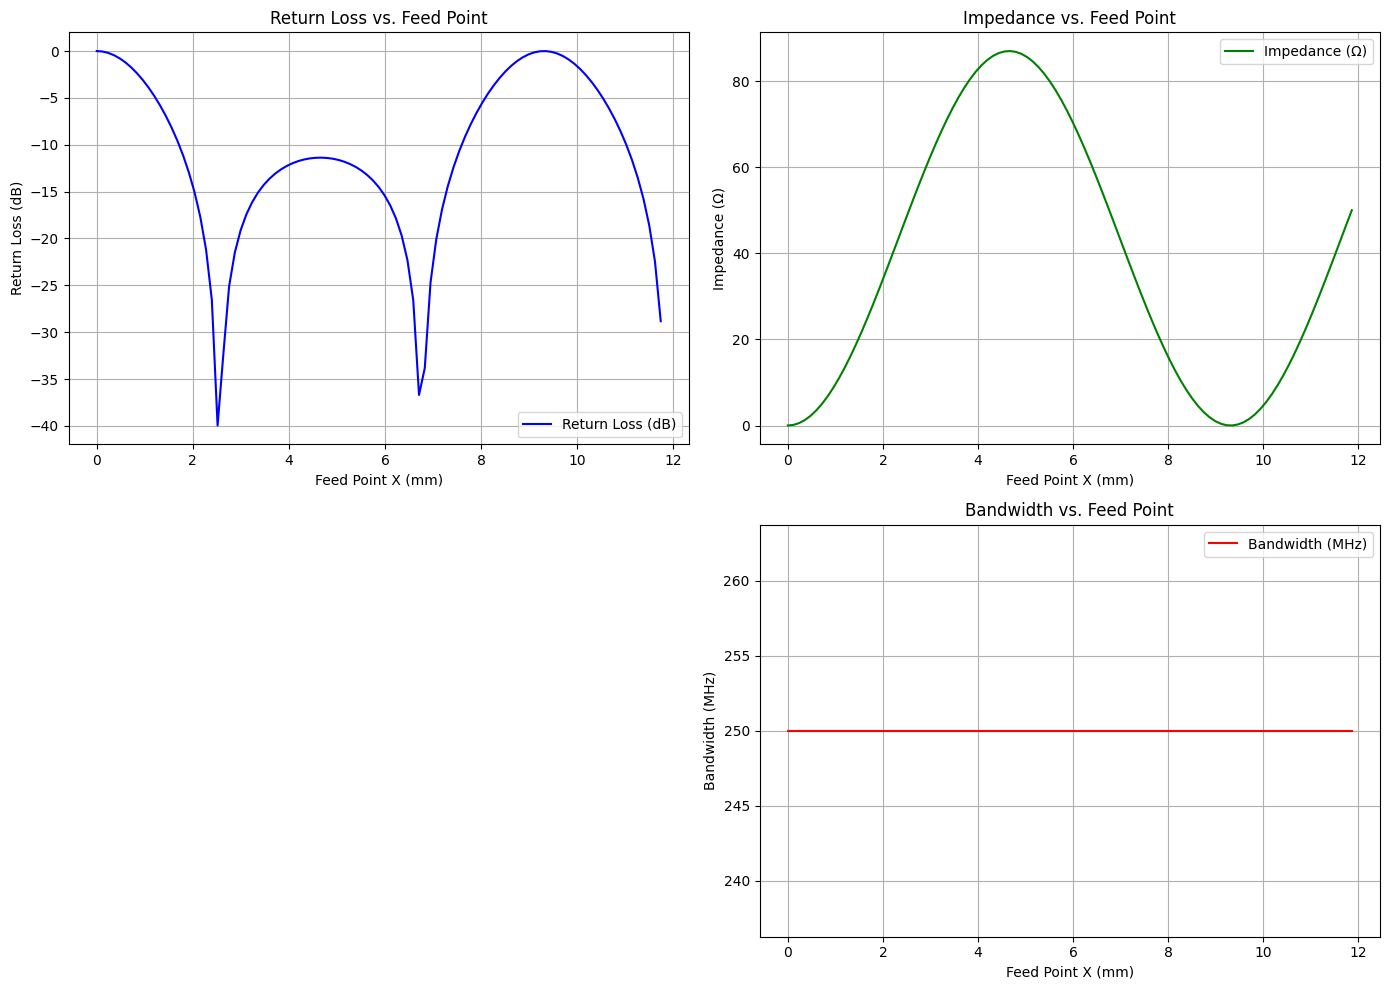

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
W = 11.86  # Patch width in mm
L = 9.31   # Patch length in mm
H = 0.79   # Substrate thickness in mm
frequency = 9.96  # GHz
f = frequency * 1e9  # Convert GHz to Hz
c = 3e8  # Speed of light in m/s
epsilon_r = 2.4  # Dielectric constant for FR4 material
Z0 = 50  # Characteristic impedance in Ohms

# Calculation of Effective Dielectric Constant
epsilon_eff = (epsilon_r + 1) / 2 + (epsilon_r - 1) / 2 * (1 + 12 * H / W) ** -0.5

# Effective Length considering Fringing Effects
delta_L = 0.412 * H * ((epsilon_eff + 0.3) * ((W / H) + 0.264)) / ((epsilon_eff - 0.258) * ((W / H) + 0.8))
L_eff = L + 2 * delta_L  # Effective length

# Resonant frequency calculation (validation)
f_resonant = c / (2 * L_eff * np.sqrt(epsilon_eff))  # in Hz
f_resonant_GHz = f_resonant / 1e9  # convert to GHz

# Wavelength
lambda_0 = c / f  # Wavelength in meters

# Generating 100 feed points across the width of the patch
feed_points = np.linspace(0, W, 100)
results = []

# Calculating for each feed point
for x_0 in feed_points:
    # Input Impedance calculation
    Z_in = Z0 * (np.sin(np.pi * x_0 / L) ** 2) / (np.sin(np.pi * W / L) ** 2)

    # Return Loss calculation
    S11 = 20 * np.log10(abs((Z_in - Z0) / (Z_in + Z0)))

    # Bandwidth calculation (assume a constant around 250 MHz based on empirical data)
    bandwidth = 250  # MHz (adjust if formula is available for calculation)

    # Gain calculation
    effective_area = W * L * 1e-6  # Area in square meters
    gain = 10 * np.log10((4 * np.pi * effective_area) / (lambda_0 ** 2))  # in dBi, assume efficiency ~100%

    # Storing results
    results.append({
        'Feed Point X (mm)': x_0,
        'Resonant Frequency (GHz)': f_resonant_GHz,
        'Return Loss (dB)': S11,
        'Bandwidth (MHz)': bandwidth,
        'Impedance (Ω)': Z_in,
        'Gain (dBi)': gain
    })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)

# Save the results to an Excel file
df.to_excel('feed_point_analysis_strict_formulas.xlsx', index=False)

# Plotting the results
plt.figure(figsize=(14, 10))

# Return Loss Plot
plt.subplot(2, 2, 1)
plt.plot(feed_points, df['Return Loss (dB)'], label='Return Loss (dB)', color='blue')
plt.xlabel('Feed Point X (mm)')
plt.ylabel('Return Loss (dB)')
plt.title('Return Loss vs. Feed Point')
plt.grid(True)
plt.legend()

# Impedance Plot
plt.subplot(2, 2, 2)
plt.plot(feed_points, df['Impedance (Ω)'], label='Impedance (Ω)', color='green')
plt.xlabel('Feed Point X (mm)')
plt.ylabel('Impedance (Ω)')
plt.title('Impedance vs. Feed Point')
plt.grid(True)
plt.legend()


# Bandwidth Plot
plt.subplot(2, 2, 4)
plt.plot(feed_points, df['Bandwidth (MHz)'], label='Bandwidth (MHz)', color='red')
plt.xlabel('Feed Point X (mm)')
plt.ylabel('Bandwidth (MHz)')
plt.title('Bandwidth vs. Feed Point')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


#Trail of Multiple Machine learning Algorithms

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the dataset
file_path = r'C:\Users\HP\Desktop\Major project Phase 1\feed_point_analysis_strict_formulas.xlsx'
# Load the dataset
data = pd.read_excel(file_path)

# Drop the frequency column (since we don't want to use it as input or output)
data = data.drop(columns=["Resonant Frequency (GHz)"])

# Check and replace infinite or NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Separate input (Feed Point X) and output (other parameters)
X = data[["Feed Point X (mm)"]]  # Input
y = data.drop(columns=["Feed Point X (mm)"])  # Output (without frequency)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results['Linear Regression'] = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
results['Polynomial Regression'] = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results['Random Forest'] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)
results['XGBoost'] = np.sqrt(mean_squared_error(y_test, y_pred_xgb))



# Multilayer Perceptron (Neural Network)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
results['MLP (Neural Network)'] = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

# Display results
for model, rmse in results.items():
    print(f"{model}: RMSE = {rmse:.4f}")


Linear Regression: RMSE = 16.1404
Polynomial Regression: RMSE = 13.2302
Random Forest: RMSE = 0.6370
XGBoost: RMSE = 1.6393
MLP (Neural Network): RMSE = 18.6536


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#predicting new value 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the dataset
file_path = r'C:\Users\HP\Desktop\Major project Phase 1\feed_point_analysis_strict_formulas.xlsx'
data = pd.read_excel(file_path)

# Drop the frequency column (since we don't want to use it as input or output)
data = data.drop(columns=["Resonant Frequency (GHz)"])
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Separate input (Feed Point X) and output (other parameters)
X = data[["Feed Point X (mm)"]]
y = data.drop(columns=["Feed Point X (mm)"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Save the model and scaler for later use
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# ---- User Input Section ---- #
# Get user input for Feed Point X
feed_point = float(input("Enter the Feed Point X (mm) value: "))

# Scale the input
feed_point_scaled = scaler.transform([[feed_point]])

# Make prediction
prediction = rf.predict(feed_point_scaled)

# Convert prediction to a DataFrame for easy viewing
pred_df = pd.DataFrame(prediction, columns=y.columns)
print("\nPredicted Antenna Characteristics:")
print(pred_df)



Predicted Antenna Characteristics:
   Return Loss (dB)  Bandwidth (MHz)  Impedance (Ω)  Gain (dBi)
0        -11.583599            250.0      85.807439    1.845204


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Changing W and L By fixing Feed point

In [8]:
import numpy as np
import pandas as pd

# Constants
H_range = np.linspace(0.5, 1.5, 5)  # Substrate thickness range in mm (adjustable)
c = 3e8  # Speed of light in m/s
epsilon_r = 2.4  # Dielectric constant for FR4 material
Z0 = 50  # Characteristic impedance in Ohms

# Fixed feed point based on highest return loss
fixed_feed_point = 2.515757576  # Feed point X (mm)

# Generate ranges for width (W), length (L), and frequency
W_range = np.linspace(8, 15, 50)  # Width range in mm
L_range = np.linspace(6, 12, 50)  # Length range in mm
frequency_range = np.linspace(8, 12, 5)  # Frequency range in GHz

results = []
max_rows = 3000  # Limit for the number of rows

# Loop over all combinations of W, L, frequency, and H
for W in W_range:
    for L in L_range:
        for frequency in frequency_range:
            for H in H_range:
                # Convert frequency to Hz
                f = frequency * 1e9

                # Calculation of Effective Dielectric Constant
                epsilon_eff = (epsilon_r + 1) / 2 + (epsilon_r - 1) / 2 * (1 + 12 * H / W) ** -0.5

                # Effective Length considering Fringing Effects
                delta_L = 0.412 * H * ((epsilon_eff + 0.3) * ((W / H) + 0.264)) / ((epsilon_eff - 0.258) * ((W / H) + 0.8))
                L_eff = L + 2 * delta_L  # Effective length

                # Resonant frequency calculation (validation)
                f_resonant = c / (2 * L_eff * np.sqrt(epsilon_eff))  # in Hz
                f_resonant_GHz = f_resonant / 1e9  # convert to GHz

                # Wavelength
                lambda_0 = c / f  # Wavelength in meters

                # Input Impedance calculation at fixed feed point
                Z_in = Z0 * (np.sin(np.pi * fixed_feed_point / L) ** 2) / (np.sin(np.pi * W / L) ** 2)

                # Return Loss calculation
                S11 = 20 * np.log10(abs((Z_in - Z0) / (Z_in + Z0)))

                # Bandwidth calculation (assume a constant around 250 MHz based on empirical data)
                bandwidth = 250  # MHz (adjust if formula is available for calculation)

                # Gain calculation
                effective_area = W * L * 1e-6  # Area in square meters
                gain = 10 * np.log10((4 * np.pi * effective_area) / (lambda_0 ** 2))  # in dBi, assume efficiency ~100%

                # Storing results
                results.append({
                    'Feed Point X (mm)': fixed_feed_point,
                    'Width (mm)': W,
                    'Length (mm)': L,
                    'Frequency (GHz)': frequency,
                    'Substrate Thickness H (mm)': H,
                    'Resonant Frequency (GHz)': f_resonant_GHz,
                    'Return Loss (dB)': S11,
                    'Bandwidth (MHz)': bandwidth,
                    'Impedance (Ω)': Z_in,
                    'Gain (dBi)': gain
                })

                # Break if we reach the maximum number of rows
                if len(results) >= max_rows:
                    break
            if len(results) >= max_rows:
                break
        if len(results) >= max_rows:
            break

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
print(df)

# Save the results to an Excel file
df.to_excel('feed_point_analysis_fixed_feed.xlsx', index=False, engine='openpyxl')


      Feed Point X (mm)  Width (mm)  Length (mm)  Frequency (GHz)  \
0              2.515758    8.000000          6.0              8.0   
1              2.515758    8.000000          6.0              8.0   
2              2.515758    8.000000          6.0              8.0   
3              2.515758    8.000000          6.0              8.0   
4              2.515758    8.000000          6.0              8.0   
...                 ...         ...          ...              ...   
3042           2.515758   14.428571          6.0              8.0   
3043           2.515758   14.571429          6.0              8.0   
3044           2.515758   14.714286          6.0              8.0   
3045           2.515758   14.857143          6.0              8.0   
3046           2.515758   15.000000          6.0              8.0   

      Substrate Thickness H (mm)  Resonant Frequency (GHz)  Return Loss (dB)  \
0                           0.50                  0.015428        -19.102212   
1          

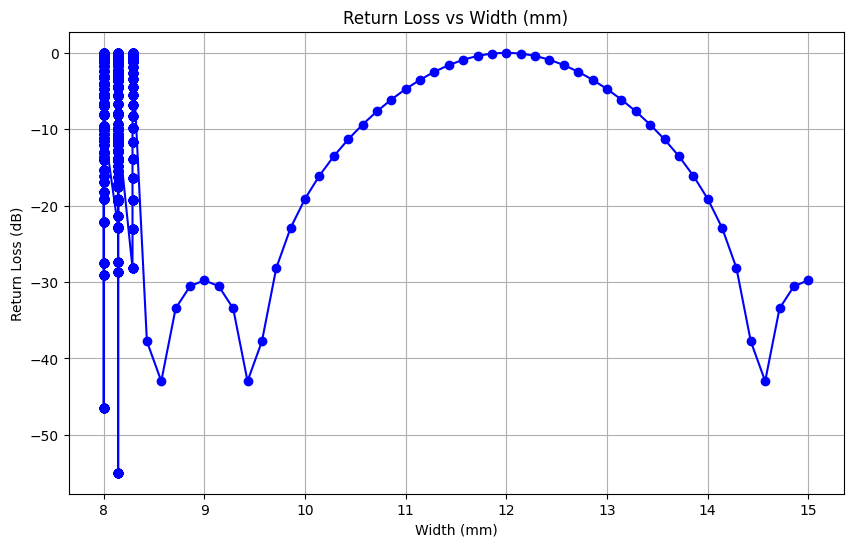

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Width (mm)'], df['Return Loss (dB)'], marker='o', linestyle='-', color='b')
plt.title('Return Loss vs Width (mm)')
plt.xlabel('Width (mm)')
plt.ylabel('Return Loss (dB)')
plt.grid(True)
plt.show()

   Feed Point X (mm)  Width (mm)  Length (mm)  Frequency (GHz)  \
0           2.515758         8.0          6.0                8   
1           2.515758         8.0          6.0                8   
2           2.515758         8.0          6.0                8   
3           2.515758         8.0          6.0                8   
4           2.515758         8.0          6.0                8   

   Substrate Thickness H (mm)  Resonant Frequency (GHz)  Return Loss (dB)  \
0                        0.50                  0.015428        -19.102212   
1                        0.75                  0.015028        -19.102212   
2                        1.00                  0.014633        -19.102212   
3                        1.25                  0.014253        -19.102212   
4                        1.50                  0.013892        -19.102212   

   Bandwidth (MHz)  Impedance (Ω)  Gain (dBi)  
0              250      62.471926   -3.676114  
1              250      62.471926   -3.67611

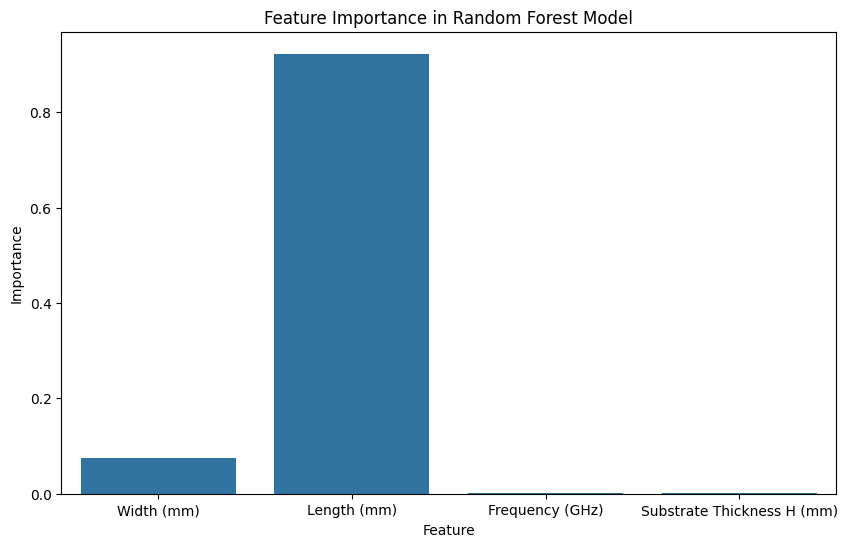

['random_forest_model.pkl']

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('feed_point_analysis_fixed_feed.xlsx', engine='openpyxl')

# Display the first few rows of the dataframe to inspect
print(df.head())

# Selecting features (X) and target variable (y)
# For demonstration, let's assume we want to predict the 'Return Loss (dB)' based on the other features
X = df[['Width (mm)', 'Length (mm)', 'Frequency (GHz)', 'Substrate Thickness H (mm)']]  # Features
y = df['Return Loss (dB)']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance - Visualize the importance of each feature
feature_importances = rf_model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Optionally, save the model for future use
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


In [15]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variables (y)
X = df[['Feed Point X (mm)', 'Width (mm)', 'Length (mm)', 'Frequency (GHz)']]
y = df[['Return Loss (dB)', 'Gain (dBi)']]  # Multiple target variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MultiOutputRegressor with Random Forest
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# You can evaluate each target's performance using mean squared error or R^2 score
for i, target in enumerate(y.columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'{target} - Mean Squared Error: {mse}, R^2 Score: {r2}')


Return Loss (dB) - Mean Squared Error: 0.6328261974279697, R^2 Score: 0.9930355699091903
Gain (dBi) - Mean Squared Error: 4.666361468870905e-05, R^2 Score: 0.9999784492720283


Deep Learning code

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2470 - mae: 0.4056 - val_loss: 0.0260 - val_mae: 0.1286
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0224 - mae: 0.1143 - val_loss: 0.0087 - val_mae: 0.0559
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mae: 0.0494 - val_loss: 0.0060 - val_mae: 0.0399
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mae: 0.0397 - val_loss: 0.0053 - val_mae: 0.0326
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mae: 0.0369 - val_loss: 0.0059 - val_mae: 0.0427
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - mae: 0.0358 - val_loss: 0.0047 - val_mae: 0.0340
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mae: 0.0383 - val_loss: 0.0048 - val_mae: 0.0360
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mae: 0.0362 - val_loss: 0.0045 - val_mae: 0.0292
Epoch 9/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss:

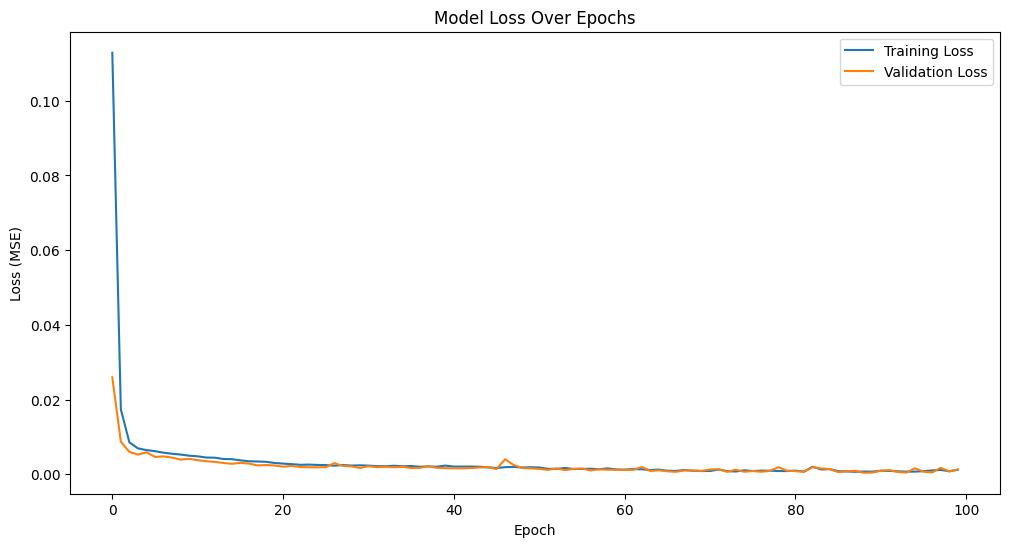

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel(r'C:\Users\HP\Desktop\Major project Phase 1\feed_point_analysis_fixed_feed.xlsx', engine='openpyxl')

# Define features (X) and target variable (y)
X = data[['Feed Point X (mm)', 'Width (mm)', 'Length (mm)', 'Frequency (GHz)']]
y = data[['Return Loss (dB)', 'Gain (dBi)']]  # Multiple targets

# Normalize the data using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the MLP model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(16, activation='relu'),  # Hidden layer 2
    Dense(y_train.shape[1])  # Output layer (number of target variables)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Absolute Error on Test Set: {mae}")

# Predict on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to get actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluate using Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.show()
